- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음 

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환 
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음 
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인 

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train,
                                                            test_size = 0.2, random_state = 12)

In [4]:
# 모델 정의 
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    
    # 은닉층 추가 
    model.add(keras.layers.Dense(100, activation = 'relu')) #활성화 함수 렐루
    
    # 안에 layer 없으면 none 
    if a_layer:
        model.add(a_layer)
    
    # 출력층 : 유닛 10개 , 활성화 함수 소프트맥스 
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    
    return model 

In [5]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
history = model.fit(scaled_train, y_train, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7621 - loss: 0.6776
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8522 - loss: 0.4062
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8682 - loss: 0.3653
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8777 - loss: 0.3366
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8837 - loss: 0.3221


- verbose 
    - 훈련 과정 출력을 조정
    - 0 : 훈련 과정 출력 안함
    - 1 : 에포크마다 진행 막대와 함께 지표 출력
    - 2 : 진행 막대를 빼고 출력 

In [8]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy를 추가하여서 loss와 accuracy가 포함됨 

In [9]:
# dictionary key 값임 
history.history

{'accuracy': [0.8106250166893005,
  0.8575208187103271,
  0.8696874976158142,
  0.8783958554267883,
  0.8833541870117188],
 'loss': [0.5333389639854431,
  0.3947417736053467,
  0.35916513204574585,
  0.3360389769077301,
  0.32296907901763916]}

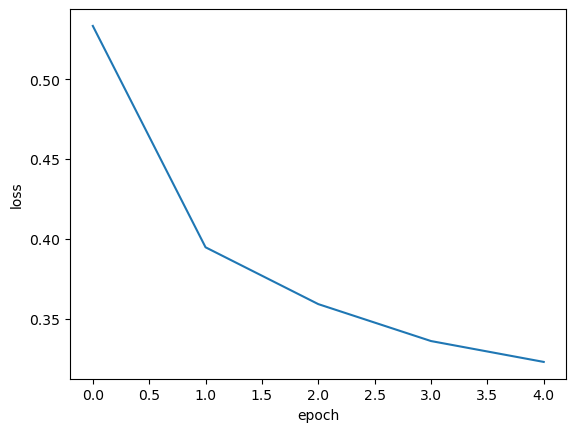

In [10]:
plt.figure()

plt.plot(history.history['loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

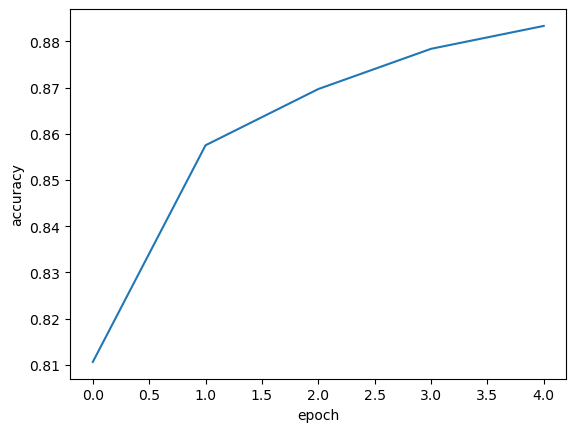

In [11]:
plt.figure()

plt.plot(history.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [12]:
# epoch를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7637 - loss: 0.6785
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8542 - loss: 0.4085
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3619
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8764 - loss: 0.3372
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3179
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8897 - loss: 0.3084
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.2973
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8974 - loss: 0.2866
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8982 - loss: 0.2828
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9037 - loss: 0.2716
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9051 - loss: 0.2678
Epoch 12/20
1500/1500 ━━━━━━━━

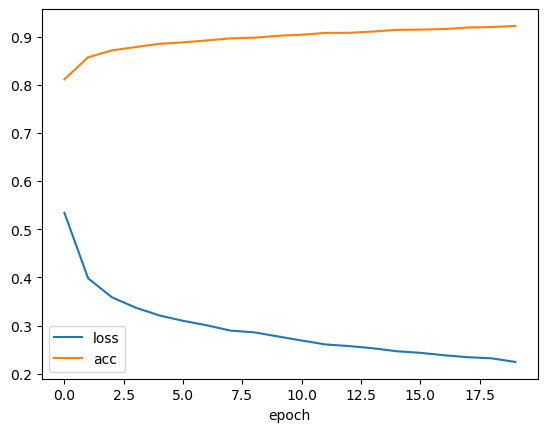

In [13]:
plt.figure()

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야 함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음 

In [14]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7599 - loss: 0.6875 - val_accuracy: 0.8622 - val_loss: 0.3899
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.4122 - val_accuracy: 0.8746 - val_loss: 0.3631
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8682 - loss: 0.3574 - val_accuracy: 0.8726 - val_loss: 0.3780
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8773 - loss: 0.3407 - val_accuracy: 0.8735 - val_loss: 0.3590
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8868 - loss: 0.3120 - val_accuracy: 0.8815 - val_loss: 0.3510
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8882 - loss: 0.3115 - val_accuracy: 0.8848 - val_loss: 0.3486
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8931 - loss: 0.2952 - val_accuracy: 0.8798 - val_loss: 0.3799
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8947 - loss: 0.2894 - 

In [15]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [16]:
history.history

{'accuracy': [0.8084583282470703,
  0.8547083139419556,
  0.8700624704360962,
  0.878083348274231,
  0.8837291598320007,
  0.8888124823570251,
  0.8923958539962769,
  0.8946041464805603,
  0.8989375233650208,
  0.9017916917800903,
  0.9047083258628845,
  0.906624972820282,
  0.9077083468437195,
  0.9090416431427002,
  0.9127916693687439,
  0.9150000214576721,
  0.9161249995231628,
  0.9177083373069763,
  0.9197499752044678,
  0.9221458435058594],
 'loss': [0.5424923300743103,
  0.3977954387664795,
  0.3583669364452362,
  0.33853721618652344,
  0.32087740302085876,
  0.3107648193836212,
  0.2997986972332001,
  0.2932674288749695,
  0.2849096953868866,
  0.27991852164268494,
  0.2714725434780121,
  0.2652948796749115,
  0.26103758811950684,
  0.2558887004852295,
  0.250930517911911,
  0.24514375627040863,
  0.2399897277355194,
  0.2356860339641571,
  0.23381876945495605,
  0.22750288248062134],
 'val_accuracy': [0.8621666431427002,
  0.8745833039283752,
  0.8725833296775818,
  0.87349998

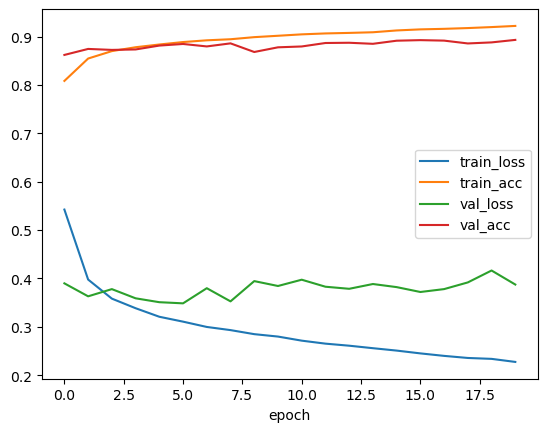

In [17]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐 
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음 

In [18]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7681 - loss: 0.6658 - val_accuracy: 0.8551 - val_loss: 0.4106
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8527 - loss: 0.4147 - val_accuracy: 0.8583 - val_loss: 0.3942
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8703 - loss: 0.3561 - val_accuracy: 0.8799 - val_loss: 0.3391
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8798 - loss: 0.3281 - val_accuracy: 0.8697 - val_loss: 0.3698
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3166 - val_accuracy: 0.8818 - val_loss: 0.3288
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8936 - loss: 0.2905 - val_accuracy: 0.8742 - val_loss: 0.3382
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8944 - loss: 0.2852 - val_accuracy: 0.8823 - val_loss: 0.3323
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.2726 - 

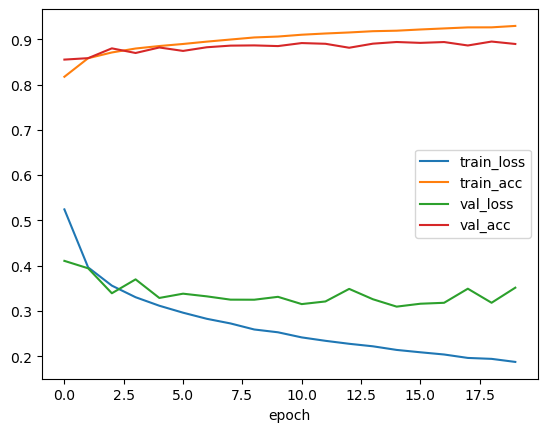

In [19]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

- RMSprop 을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임 

# 드롭아웃(dropout)


<img src = './image/dropout.png'>

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지 
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음 
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습 
        
- 드롭아웃은 케라스에서 Dropout 클래스로 제공 
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦 
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터는 없음 

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에 드롭아웃을 적용하지 않아야 함 ]
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음 

In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7329 - loss: 0.7722 - val_accuracy: 0.8453 - val_loss: 0.4307
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8341 - loss: 0.4562 - val_accuracy: 0.8674 - val_loss: 0.3803
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8488 - loss: 0.4157 - val_accuracy: 0.8687 - val_loss: 0.3603
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8589 - loss: 0.3881 - val_accuracy: 0.8756 - val_loss: 0.3519
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8675 - loss: 0.3626 - val_accuracy: 0.8779 - val_loss: 0.3502
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8733 - loss: 0.3487 - val_accuracy: 0.8794 - val_loss: 0.3328
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8737 - loss: 0.3426 - val_accuracy: 0.8803 - val_loss: 0.3341
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8778 - loss: 0.3377 - 

- validation_loss 검증 손실이 적어야 일반화 성능이 잘 나올 가능성이 높다 
- 16번 0.3109 val_loss 가 제일 잘 나옴 

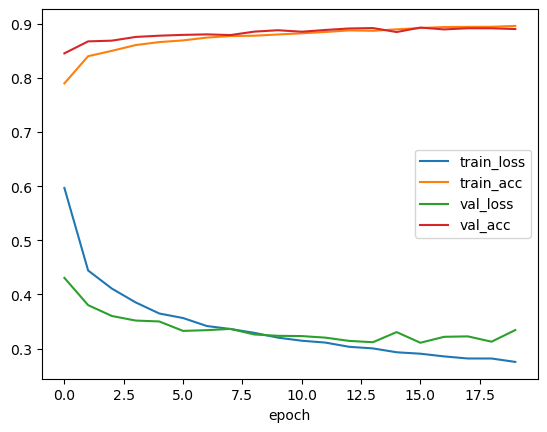

In [26]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

- validation loss 가 거의train loss 랑 붙어서 감, 성능이 엄청 좋아짐.
- 정확도가 예쁘게 딱 붙음
- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨 

# 모델 저장과 복원

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history = model.fit(scaled_train, y_train, epochs= 12, validation_data= (scaled_val, y_val))

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7280 - loss: 0.7673 - val_accuracy: 0.8391 - val_loss: 0.4367
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8362 - loss: 0.4576 - val_accuracy: 0.8659 - val_loss: 0.3680
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8500 - loss: 0.4169 - val_accuracy: 0.8731 - val_loss: 0.3559
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8574 - loss: 0.3862 - val_accuracy: 0.8739 - val_loss: 0.3509
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8656 - loss: 0.3723 - val_accuracy: 0.8648 - val_loss: 0.3771
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8703 - loss: 0.3552 - val_accuracy: 0.8811 - val_loss: 0.3306
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8706 - loss: 0.3494 - val_accuracy: 0.8775 - val_loss: 0.3357
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8746 - loss: 0.3359 - 

- 12 번 0.3094 val_loss 가 제일 낮음, 성능이 제일 좋은 것 

- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공 

In [33]:
model.save_weights('./model/model.weights.h5')

In [34]:
model.save("./model/model-whole.keras")

## 모델 파라미터만 읽어오기 

In [35]:
# 가중치를 전달할때는 똑같은형식으로 모델을 만들어야 함 
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./model/model.weights.h5')

- load_weights() 메서드를 사용하면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야함 

In [38]:
val_labels = np.argmax(model.predict(scaled_val), axis = 1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


In [39]:
val_labels

array([3, 0, 8, ..., 0, 7, 5], dtype=int64)

In [40]:
# 검증데이터에 대한 정답값 
y_val

array([3, 0, 8, ..., 0, 7, 5], dtype=uint8)

In [41]:
val_labels == y_val

array([ True,  True,  True, ...,  True,  True,  True])

In [42]:
np.mean(val_labels == y_val)

0.8893333333333333

- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어져 있기 떄문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용 
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번재 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음 
- argmax()로 고른 인덱스와 타깃 인덱스를 비교하며 같으면 True, 다르면 False
    - 위 값의 평균을 구하면 정확도가 됨 

# 모델 전체 읽어오기

In [45]:
model = keras.models.load_model("./model/model-whole.keras")

In [46]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8902 - loss: 0.2974


[0.3094293475151062, 0.8893333077430725]

# 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit()메서드의 callbacks 매개변수에 리스트로 전달하여 사용 

## ModelCheckpoint 콜백 

- 최상의 검증 점수를 만드는 모델을 저장 

In [22]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-model.keras', 
                                                save_best_only = True)

In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
          callbacks= [checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7277 - loss: 0.7773 - val_accuracy: 0.8526 - val_loss: 0.4120
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8393 - loss: 0.4494 - val_accuracy: 0.8657 - val_loss: 0.3742
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8501 - loss: 0.4071 - val_accuracy: 0.8751 - val_loss: 0.3498
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8588 - loss: 0.3901 - val_accuracy: 0.8755 - val_loss: 0.3469
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.3694 - val_accuracy: 0.8794 - val_loss: 0.3354
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8684 - loss: 0.3595 - val_accuracy: 0.8846 - val_loss: 0.3260
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8775 - loss: 0.3406 - val_accuracy: 0.8798 - val_loss: 0.3308
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8739 - loss: 0.3399 - 

- 모델이 훈련한 후에 best-model.keras 에 최상의 val_loss 를 낸 모델이 저장됨

In [25]:

model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8914 - loss: 0.3022


[0.3148576617240906, 0.8923333287239075]

In [28]:
model = keras.models.load_model('./model/best-model.keras')

In [29]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8963 - loss: 0.2966


[0.31051817536354065, 0.893916666507721]

- ModelCheckpoint 콜백이 가장 낮은 검증 손실값의 모델을 자동으로 저장해주어 편하지만 여전히 20번의 훈련을 해야해서 불편함이 있음 

## EarlyStopping  콜백

- 과대적합이 시작되기 전에(검증 점수가 상승할 때) 훈련을 미리 중지하는 것을 조기 종료(early stopping)라고 부름 
- 단순히 **훈련 에포크 횟수를 제한하는 역할**이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 여겨지기도 함

In [30]:
# patience = 2 : 2 에포크를 지켜본다
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

- patience
    - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
    - patience 가 2라면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지 
    
- restore_best_weights (강사님이 선호하심) 
    - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림 

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
                    callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7297 - loss: 0.7671 - val_accuracy: 0.8530 - val_loss: 0.4179
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8359 - loss: 0.4478 - val_accuracy: 0.8637 - val_loss: 0.3752
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8524 - loss: 0.4105 - val_accuracy: 0.8743 - val_loss: 0.3564
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8618 - loss: 0.3806 - val_accuracy: 0.8756 - val_loss: 0.3464
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8669 - loss: 0.3653 - val_accuracy: 0.8820 - val_loss: 0.3358
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8653 - loss: 0.3581 - val_accuracy: 0.8800 - val_loss: 0.3378
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3446 - val_accuracy: 0.8805 - val_loss: 0.3365


In [33]:
# 몇 번째 에포크에서 중지되었는지 확인-(early stopping 콜백은 0번째부터 셈)
# 에포크는 1번째 부터 셈 
print(early_stopping_cb.stopped_epoch)

6


- 10번째 에포크까지 훈련한 후 중지됨
    - patience가 2이기 때문에 8번째 에포크 때의 모델이 최상의 모델임 

In [34]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8829 - loss: 0.3277


[0.3357929587364197, 0.8820000290870667]

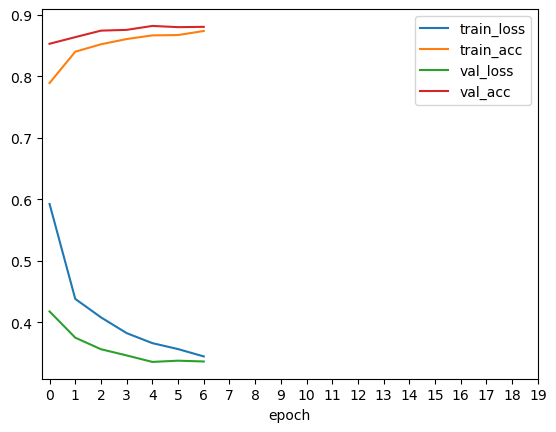

In [35]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.xticks(ticks = range(20))
plt.legend()
plt.xlabel('epoch')
plt.show()

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나누어서 훈련/검즘을 수행 

In [39]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_test = x_test / 255

In [38]:
# validation_split=0.2 : 훈련 데이터 중에 20퍼만 돌려봐, 검증값을 계산하는데 사용됨 
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(scaled_train, y_train, epochs = 20, validation_split=0.2,
                    callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7362 - loss: 0.7521 - val_accuracy: 0.8340 - val_loss: 0.4448
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8375 - loss: 0.4532 - val_accuracy: 0.8618 - val_loss: 0.3921
